### 14
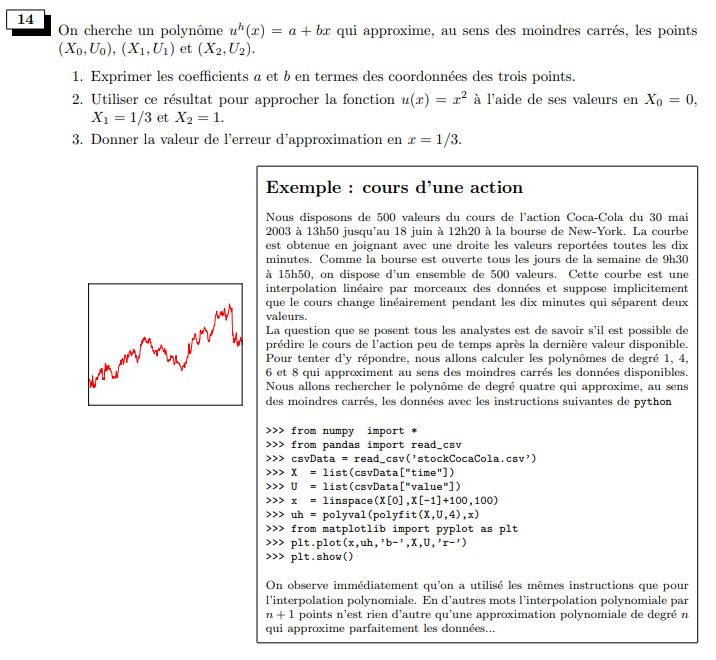

Confer Notability

### Code du tuteur

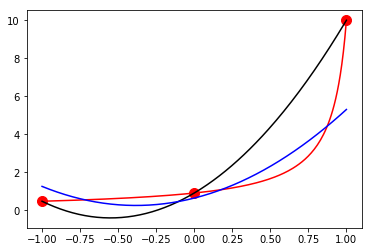

In [3]:
# %load demo3Approximation.py
#
# Approximation, interpolation 
# L'utilisation des fonctions dite lambda en Python au passage
#
# Vincent Legat - 2018
# Ecole Polytechnique de Louvain
#

from numpy import *
from scipy.integrate import quad
from numpy.linalg import solve
import matplotlib.pyplot as plt

#
# Définition de fonction inline en Python...
# C'est super compacte et très pratique
# On peut aussi l'utiliser pour créer des fonctions anonymes
# par exemple dans l'appel de la quadrature
#

u = lambda x : 1/(1.1-x)

#
# Une fonction lambda et ce que Python appelle un dictionnaire
# et qui permet d'implémenter le switch de MATLAB ou du C
# C'est assez joli mais un peu cryptique
#
    
phi = lambda id,x : { 
    0 : lambda x: x*(1+x)/2,
    1 : lambda x: -x*(1-x)/2,
    2 : lambda x: (1-x)*(1+x)  
  }[id](x)

#
# Ensuite, refaire le même code en définissant les fonctions
# avec des instruction dev et des if/else : c'est plus long mais
# moins cryptique : il faut donc voir cela avec prudence
#

  
def lagrange(x,U):
  u = zeros(size(x))
  for i in range(3):
    u += U[i]*phi(i,x)
  return u
 
#
# -1- La fonction de référence
#
   
X = array([1,-1,0])
U = u(X)
plt.plot(X,U,'.r',markersize=20)
x = linspace(-1,1,200)
plt.plot(x,u(x),'-r')

#
# -2- L'interpolation :-)
#

uInterpolation = lagrange(x,U)
plt.plot(x,uInterpolation,'-k')

#
# -3- L'approximation
#

b = zeros(3) #preallouage
A = zeros((3,3))
for i in range(3):
  b[i] = quad(lambda x: u(x)*phi(i,x),-1,1)[0]
  for j in range(3):
    A[i,j] = quad(lambda x: phi(i,x)*phi(j,x),-1,1)[0]

Uapp = solve(A,b)
uApproximation = lagrange(x,Uapp)
plt.plot(x,uApproximation,'-b')
plt.show()






### 18
